#  `satn_to_movie` 

Produces a movie of the invasion sequence from `ibip filter`. This method can be applied for visualizing image-based invasion percolation algorithm.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
from IPython.display import HTML
ps.visualization.set_mpl_style()
inspect.signature(ps.visualization.satn_to_movie)

<Signature (im, satn, cmap='viridis', c_under='grey', c_over='white', v_under=0.001, v_over=1.0, fps=10, repeat=True)>

## `im`

The input image is a Boolean image `True` values indicating the void voxels and `False` for solid. Let's create a test image:

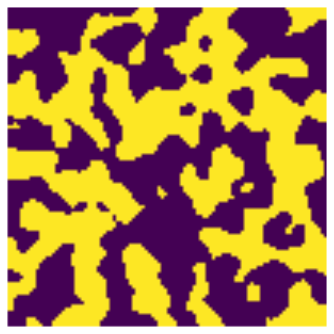

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[100,100], blobiness=1)
fig, ax = plt.subplots()
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

## `satn`

The saturation image can be generated from `ibip` data using `seq_to_satn` method. The `satn` is the image of porous material where each voxel indicates the global saturation at which it was invaded. Voxels with 0 values indicate solid and and -1 indicate uninvaded.

In [3]:
bd = np.zeros_like(im, dtype=bool)
bd[:, 0] = 1
bd *= im
out = ps.filters.ibip(im=im, inlets=bd)
inv_seq, inv_size = out.inv_sequence, out.inv_sizes
satn = ps.filters.seq_to_satn(seq=inv_seq)

  0%|          | 0/9999 [00:00<?, ?it/s]

Now we can create an animation of the invasion sequence using `satn_to_movie`: (To save animation as a file and for visualizing use `animation.save`)

  0%|          | 0/389 [00:00<?, ?it/s]

 13%|█▎        | 50/389 [00:00<00:01, 313.89it/s]

 62%|██████▏   | 243/389 [00:00<00:00, 1075.51it/s]

 99%|█████████▉| 386/389 [00:00<00:00, 1217.60it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

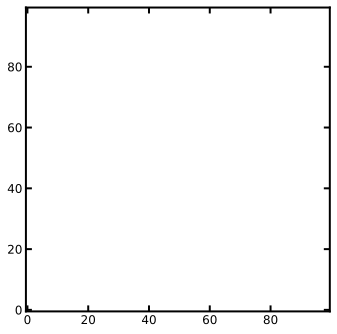

In [4]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn)
mov_image_based_ip = mov.to_html5_video()

In [5]:
HTML(mov_image_based_ip)

NameError: name 'mov_image_based_ip' is not defined

## `cmap`

The Colormap used to map invasion sequence values to colors. By default the cmap is 'viridis'.

  0%|          | 0/389 [00:00<?, ?it/s]

 40%|███▉      | 154/389 [00:00<00:00, 1532.97it/s]

 81%|████████▏ | 317/389 [00:00<00:00, 1587.01it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

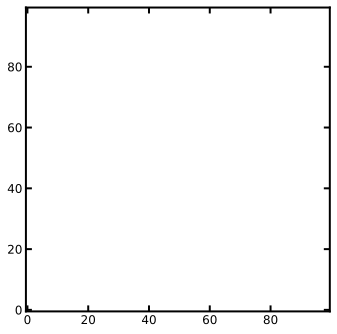

In [6]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, cmap='plasma')
image_based_ip_cmap = mov.to_html5_video()

In [7]:
HTML(image_based_ip_cmap)

NameError: name 'image_based_ip_cmap' is not defined

## `c_under`

Colormap to be assigned to the lowest color bound (under color) in the color map. The voxeled colored by `c_under` are the uninvaded void space. The default under color is grey.

  0%|          | 0/389 [00:00<?, ?it/s]

 50%|████▉     | 193/389 [00:00<00:00, 1926.67it/s]

 99%|█████████▉| 387/389 [00:00<00:00, 1931.82it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

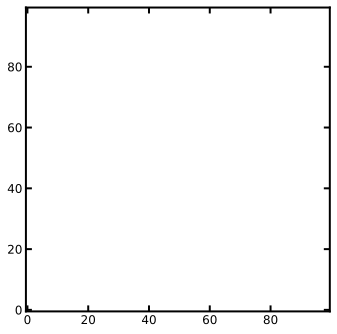

In [8]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, c_under='green')
image_based_ip_c_under = mov.to_html5_video()

In [9]:
HTML(image_based_ip_c_under)

NameError: name 'image_based_ip_c_under' is not defined

## `c_over`

Colormap to be assigned to the highest color bound (over color) in the color map. The voxeled colored by `c_overer` are the solid phase. The default over color is white.

  0%|          | 0/389 [00:00<?, ?it/s]

 51%|█████     | 199/389 [00:00<00:00, 1988.39it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

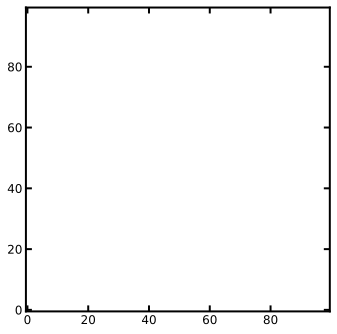

In [10]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, c_over='yellow')
image_based_ip_c_over = mov.to_html5_video()

In [11]:
HTML(image_based_ip_c_over)

NameError: name 'image_based_ip_c_over' is not defined

## `v_under`

This is the lowest bound of `satn` data range that the colormap covers. By default, the `v_under` is 0.001.

  0%|          | 0/389 [00:00<?, ?it/s]

 56%|█████▌    | 218/389 [00:00<00:00, 2170.38it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

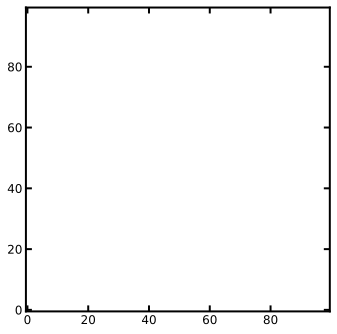

In [12]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, v_under=0.2)
image_based_ip_v_under = mov.to_html5_video()

In [13]:
HTML(image_based_ip_v_under)

NameError: name 'image_based_ip_v_under' is not defined

## `v_over`

This is the highest bound of `satn` data range that the colormap covers. By default, the `v_over` is 1.

  0%|          | 0/389 [00:00<?, ?it/s]

 51%|█████▏    | 200/389 [00:00<00:00, 1993.91it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

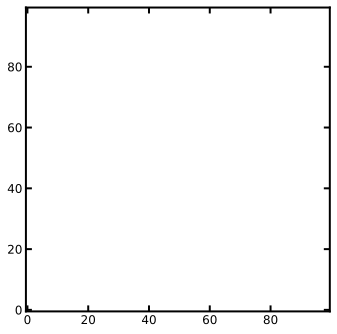

In [14]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, v_over=0.5)
image_based_ip_v_over = mov.to_html5_video()

In [15]:
HTML(image_based_ip_v_over)

NameError: name 'image_based_ip_v_over' is not defined

## `fps`

This is the frames per second that the animation will be saved at. The default value is 10.

  0%|          | 0/389 [00:00<?, ?it/s]

 51%|█████     | 199/389 [00:00<00:00, 1984.97it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

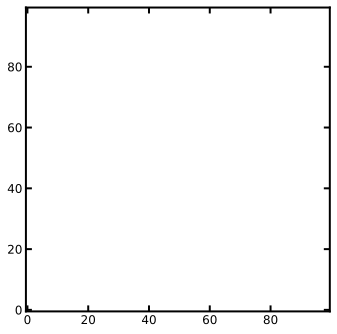

In [16]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, fps=5)
image_based_ip_fps = mov.to_html5_video()

In [17]:
HTML(image_based_ip_fps)

NameError: name 'image_based_ip_fps' is not defined

## `repeat`

This variable indicates whether the animation [repeats](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.animation.ArtistAnimation.html#matplotlib.animation.ArtistAnimation) when the sequence of frames is completed. By default `repeat`=True.

  0%|          | 0/389 [00:00<?, ?it/s]

 49%|████▉     | 191/389 [00:00<00:00, 1908.87it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

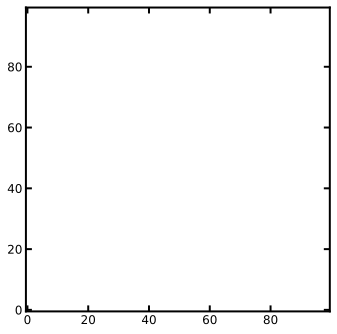

In [18]:
mov = ps.visualization.satn_to_movie(im=im, satn=satn, repeat=False)
image_based_ip_repeat = mov.to_html5_video()

In [19]:
HTML(image_based_ip_repeat)

NameError: name 'image_based_ip_repeat' is not defined